[2 3 -4 3 -1 2 4 -2 0 -2 -1 -4]
Accuracy 85.71428571428571 %


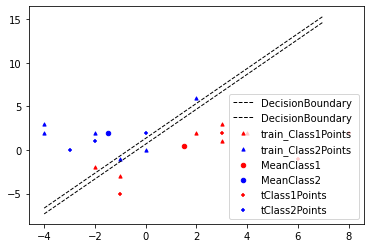

In [1]:
"""
Course name:Pattern Recognition
Course no:Cse-4214
Experiment name:Designing minimum distance to Class Mean Classifier

"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# task-1-start
df = pd.read_csv('train.txt', sep=" " ,  header = None, dtype = 'Int64')

a = df.values
t_x=a[:,0]
t_y=a[:,1]
t_l=a[:,2]
print(t_x)
c1x=[]
c1y=[]
c2x=[]
c2y=[]
for i in range(len(a)):
    if (t_l[i]==1):
     c1x.append(t_x[i])
     c1y.append(t_y[i])
   
    else:
     c2x.append(t_x[i])
     c2y.append(t_y[i])
    
plt.scatter(c1x, c1y, s=10, color = 'red', marker='^',label='train_Class1Points')
plt.scatter(c2x, c2y, s=10, color = 'blue', marker='^',label='train_Class2Points')

# task-1-complete

# task-2-start
xmn1=np.mean(c1x)
ymn1=np.mean(c1y)
xmn2=np.mean(c2x)
ymn2=np.mean(c2y)

c_1_m=[]
c_2_m=[]
c_1_mt=[]
c_2_mt=[]

c_1_m=(np.array([[xmn1,ymn1]]))
c_2_m=(np.array([[xmn2,ymn2]]))




c_1_mt=np.transpose(c_1_m)
c_2_mt=np.transpose(c_2_m)


plt.scatter(xmn1, ymn1, s=20, color = 'red', marker='o',label='MeanClass1')
plt.scatter(xmn2, ymn2, s=20, color = 'blue', marker='o',label='MeanClass2')


df_t = pd.read_csv('test.txt', sep=" " ,  header = None, dtype = 'Int64')

a_ts = df_t.values
ts_x=a_ts[:,0]
ts_y=a_ts[:,1]
ts_l=a_ts[:,2]
ts_c1x=[]
ts_c1y=[]
ts_c2x=[]
ts_c2y=[]
count=0;

for i in range(len(a_ts)):
    id=ts_l[i];
  

    test = np.array([df_t[0][i], df_t[1][i]])
  
   
    g1x=(test.dot(c_1_mt) - (int(0.5 * c_1_m.dot(c_1_mt))))
    g2x=(test.dot(c_2_mt) - (int(0.5 * c_2_m.dot(c_2_mt))))

    
    
    if g1x > g2x:
       ts_c1x.append(ts_x[i])
       ts_c1y.append(ts_y[i])
       if (id==1):
          count=count+1
      
    else:
        ts_c2x.append(ts_x[i])
        ts_c2y.append(ts_y[i])
        if (id==2):
          count=count+1
      

plt.scatter(ts_c1x, ts_c1y, s=10, color = 'red', marker='+',label='tClass1Points')
plt.scatter(ts_c2x, ts_c2y, s=10, color = 'blue', marker='+',label='tClass2Points')
# task-2-complete


# task-3
X1=[]
X=np.append(t_x,ts_x)
X_max=max(X)
X_min=min(X)
x=np.arange(X_min,X_max,1)
m1=xmn1-xmn2
m2=ymn1-ymn2
y=[]
c = int(0.5 * (c_1_m.dot(c_1_mt) - c_1_m.dot(c_2_mt)))//1,2

for i in range(len(x)):
    y1=(((x[i] * m1) + c) / -m2) 
    y.append(y1)


line1 = plt.plot(x, y, '--k', linewidth=1,label='DecisionBoundary ')




# task-4
accuracy=(count/len(a_ts))*100
print("Accuracy",accuracy,"%")


plt.legend()
plt.show()